In [7]:
import warnings
warnings.filterwarnings('ignore')

from Useful_functions import print_cm, print_means
import pickle
import numpy as np
from Running_models import print_base_metrics

import os

In [8]:
sizes = [2261, 7439, 18957, 22111, 24704, 3465, 5572, 8885, 14363, 5534]
cum_sizes = np.cumsum(sizes)

list_labels = ('airport', 'airport hangar', 'airport terminal', 'amusement park', 'aquaculture', 'archaeological site', 'barn', 
                   'border checkpoint', 'burial site', 'car dealership', 'construction site', 'crop field', 'dam', 'debris/rubble', 
                   'educational institution', 'electric substation', 'factory/powerplant', 'fire station', 'flooded road', 'fountain', 
                   'gas station', 'golf course', 'ground transportation station', 'helipad', 'hospital', 'impoverished settlement', 
                   'interchange', 'lake/pond', 'lighthouse', 'military facility', 'multi-unit residential', 'nuclear powerplant', 
                   'office building', 'oil/gas facility', 'park', 'parking lot/garage', 'place of worship', 'police station', 'port', 
                   'prison', 'race track', 'railway bridge', 'recreational facility', 'road bridge', 'runway', 'shipyard', 'shopping mall', 
                   'single-unit residential', 'smokestack', 'solar farm', 'space facility', 'stadium', 'storage tank', 'surface mine', 
                   'swimming pool', 'toll booth', 'tower', 'tunnel opening', 'waste disposal', 'water treatment facility', 'wind farm', 'zoo')
labels = {}
for i, name in enumerate(list_labels):
    labels[i] = name

In [9]:
dim_reduction = 'Original features'
feature_extraction = 'resnet18'
classification_method = 'Softmax regression'
components = 512
window_size = None

In [10]:
if dim_reduction == 'Original features':
    directory = f"saved_data/{dim_reduction}/{feature_extraction}/{classification_method} model"
    fig_directory = f"figures/{dim_reduction}/{feature_extraction}/{classification_method} model"
elif dim_reduction == 'UMAP_streaming':
    directory = f"saved_data/{dim_reduction}/{feature_extraction}/{components} components/{window_size} window length/{classification_method} model"
    fig_directory = f"figures/{dim_reduction}/{feature_extraction}/{components} components/{window_size} window length/{classification_method} model"
else: 
    directory = f"saved_data/{dim_reduction}/{feature_extraction}/{components} components/{classification_method} model"
    fig_directory = f"figures/{dim_reduction}/{feature_extraction}/{components} components/{classification_method} model"
if not os.path.exists(directory) or not os.path.exists(fig_directory):
    print('Requested data are not available. Check if the run was executed and/or the informations provided are correct')
    print(directory)
    print(fig_directory)

with open(f'{directory}/List of metrics.pkl', 'rb') as f:
    metrics = pickle.load(f)
with open(f'{directory}/Final confusion matrix.pkl', 'rb') as f:
    cm=pickle.load(f)
with open(f'{directory}/List of confusion matrices.pkl', 'rb') as f:
    cm_list=pickle.load(f)
with open(f"saved_data/Original features/{feature_extraction}/{classification_method} model/List of metrics.pkl", 'rb') as f:
    baseline = pickle.load(f)

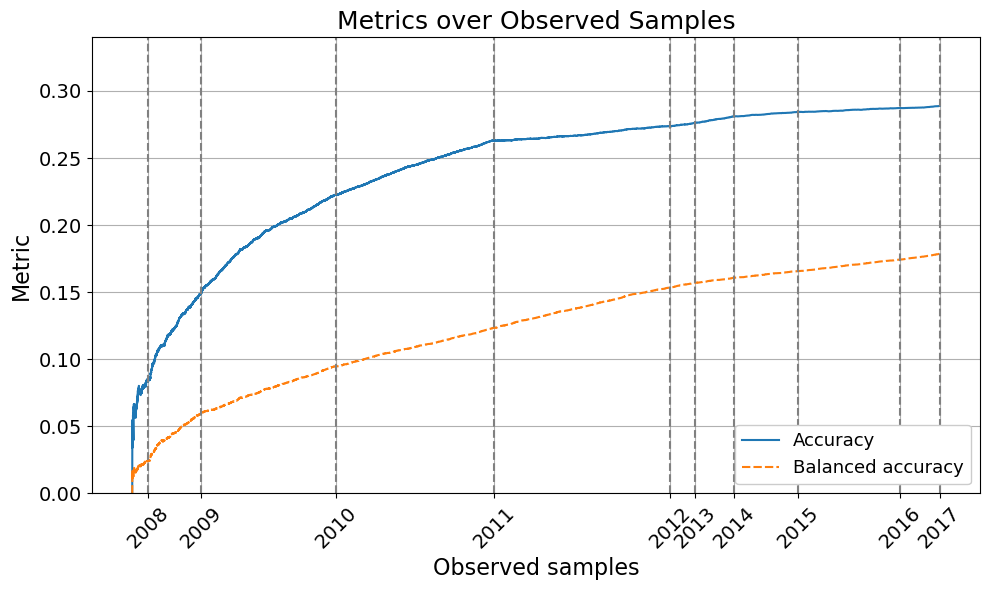

In [11]:
fig_directory = f"figures/Initial data"
years = list(range(2008, 2018))
print_base_metrics(metrics, cum_sizes, years, fig_directory)

Accuracy over each batch: [0.0714, 0.1225, 0.1925, 0.244, 0.2678, 0.2748, 0.2786, 0.2827, 0.2857, 0.2878]
Final accuracy is: 0.2423
Balanced accuracy over each batch: [0.0198, 0.0448, 0.0776, 0.109, 0.139, 0.1553, 0.1587, 0.1632, 0.17, 0.1763]
Final balanced accuracy is: 0.1234


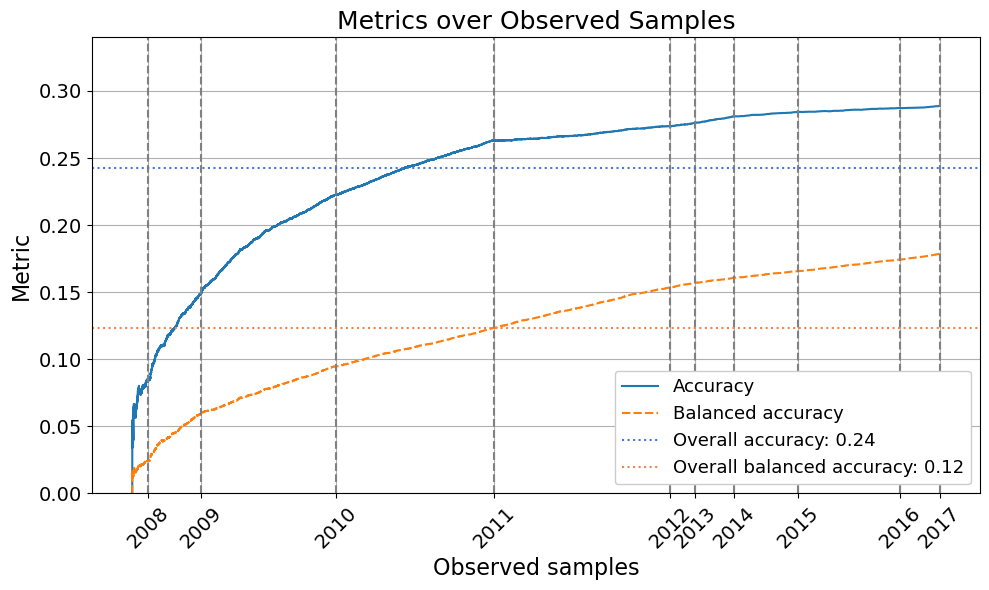

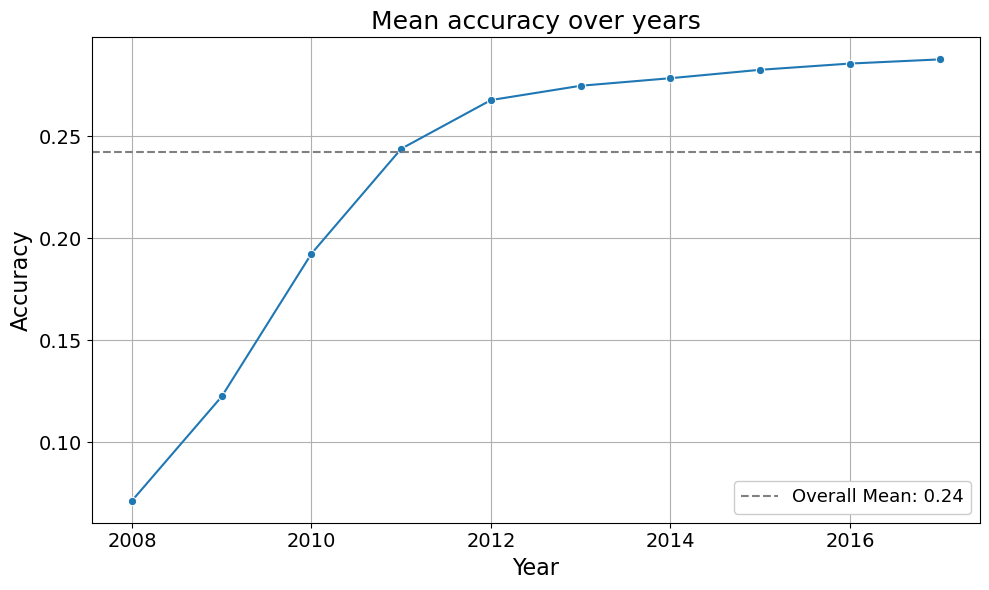

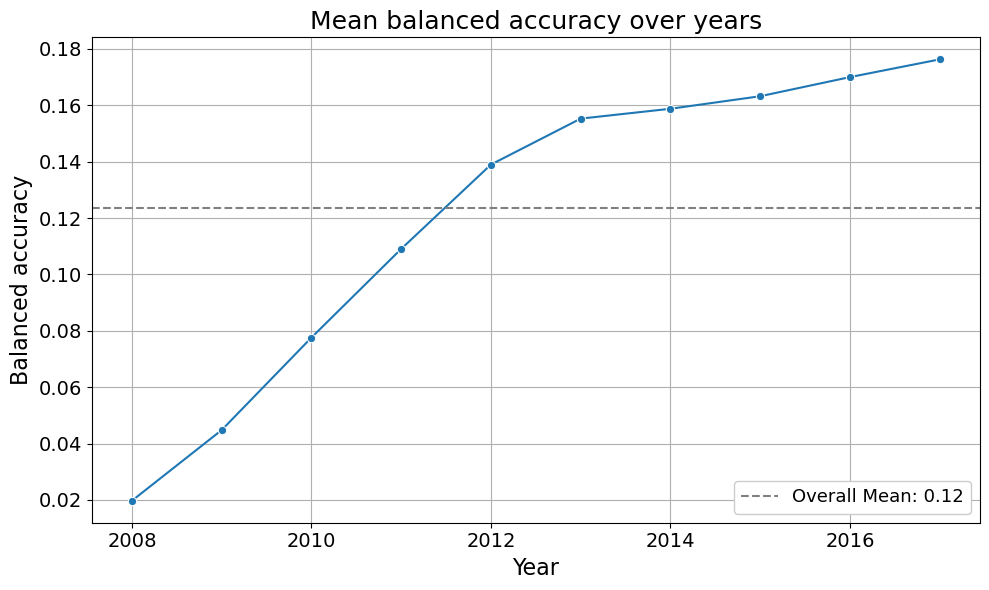

In [ ]:
# Plot the obtained metrics
years = list(range(2008, 2018))
print_base_metrics(metrics, cum_sizes, years, fig_directory)

#print_rolling_metrics(metrics, cum_sizes, fig_directory)

# Plot the average accuracy and balanced accuracy
(mean_acc, full_mean) = print_means(cum_sizes, metrics, years[:len(sizes)], fig_directory, "accuracy", 0)
print(f'Accuracy over each batch: {[round(mean, 4) for mean in mean_acc]}')
print(f'Final accuracy is: {full_mean:.4f}')

(mean_acc, full_mean) = print_means(cum_sizes, metrics, years[:len(sizes)], fig_directory, "balanced accuracy", 1)
print(f'Balanced accuracy over each batch: {[round(mean, 4) for mean in mean_acc]}')
print(f'Final balanced accuracy is: {full_mean:.4f}')

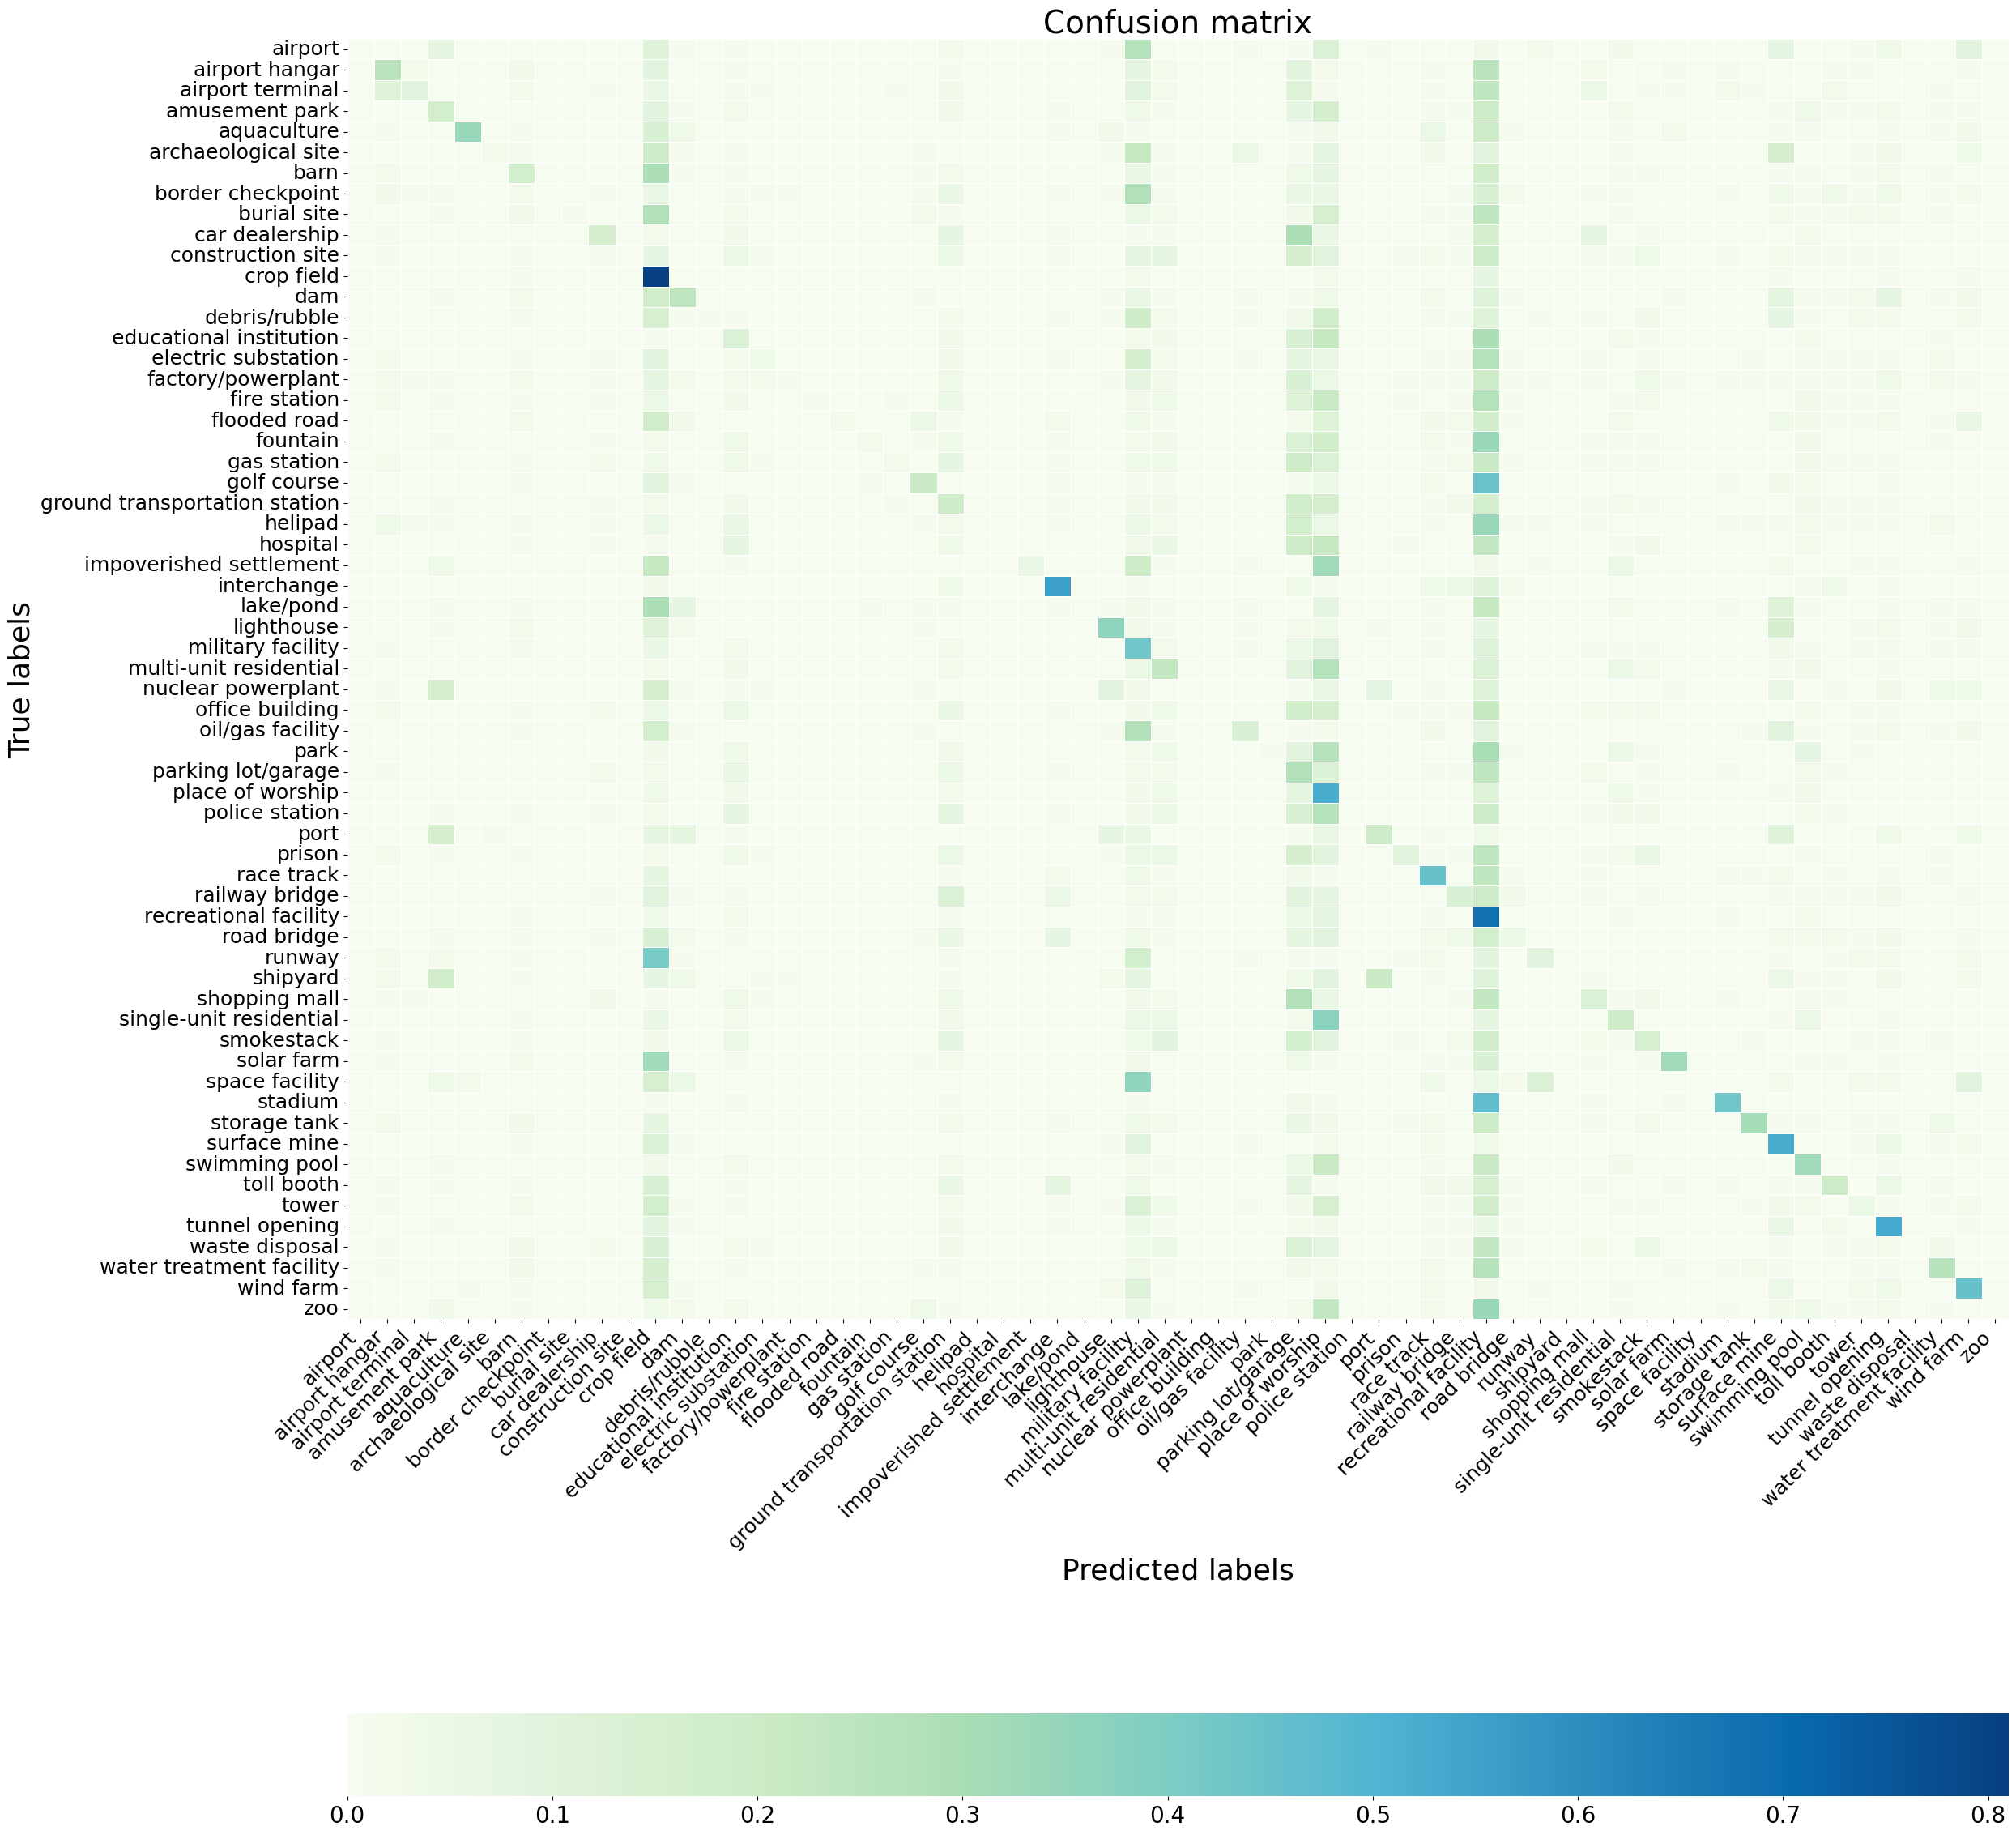

In [6]:
print_cm(cm=cm, labels=labels, directory=fig_directory, title='full_confusion_matrix', threshold=0.045)